## <span style="color:blue"> Ex 6 - Stefano Schmidt </span>

To sample from Ising model states with fixed temperature the class `ising_simulator` has been developed. Its declaration is in file **ising_simulator.h** and its definition is in file **ising_simulator.cpp**<br>
The class provides a representation of a 1D Ising chain and some methods for generating a new configuration (via Metropolis or Gibbs sampling) as well as methods for making measures and averaging them. The quanties that can be computed are: **Internal energy**, **Specific heat**, **Magnetization** and **Susceptivity**.<br>
A configuration can be loaded from file and the initial parameters must be specified in an input file given to the class constructor. Its structure is as follows:
- `temp` (temperature)
- `nspin` (# spins)
- `J` (interaction strenght)
- `h` (external field)
- `0`/`1` (Gibbs/Metropolis sampling)
- `nmeas` (# of measures for each block)

The temperature can be changed through a dedicated method while the other parameters cannot be changed once a class object is istantiated.

### Exercise 6.1
The required simulations are performed in file **ex_6.cpp**. It reads an initial configuration **initial.config** and sampling from distribution at different temperautures it produces a file for each interesting physical quantity computed by the class with the average for that quantity (with its uncertainty) as a function of temperature.<br>
Every file is produced with a $M = 2 \cdot 10^4$ points; sparse averaging is used with a step of 4. Temperature is varies from 0.1 to 5 in 50 steps. <br>
The following physical parameters are used: $nspin = 50$, $J = 1.0$, $nmeas = 50$ and $h = 0.02$ (only for computing magnetization, 0 otherwise). 

The file are stored in folder **./out/**. With the following code it is possible to plot the interesting quantities and their theoretical values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#computing theoretical quantities
N_spins = 50
points=100
T = np.linspace(0.2,5.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

#energy, heat and chi
e = -J*( th + ch*thN )/( 1 + thN ) * N_spins
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2) * N_spins
chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)* N_spins

#magnetization
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = N_spins * (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

In [3]:
#useful function for making plots
def plot_quantity(quantity):
    """Makes a plot of the physical quantity specified in quantity as a function of temperature for an Ising model.
    It takes data from files in folder ./out/
    """
    met_data = np.loadtxt("./out/met_"+quantity+".dat", dtype=float)
    gibbs_data = np.loadtxt("./out/gibbs_"+quantity+".dat", dtype=float)
    plt.figure(figsize=(15, 5))
    
    if quantity == "energy":
        teo_q = e
    if quantity == "chi":
        teo_q = chi
    if quantity == "heat":
        teo_q = heat
    if quantity == "mag":
        teo_q = M

    plt.subplot(1,2,1) 
    plt.title("Ising "+quantity+" Metropolis")
    plt.xlabel("T")
    plt.ylabel(quantity)
    plt.plot(T,teo_q, label="theoretical "+quantity)
    plt.errorbar(met_data[:,0], met_data[:,1],yerr=met_data[:,2],label="Metropolis "+quantity)
    plt.legend()

    plt.subplot(1,2,2) 
    plt.title("Ising "+quantity+" Gibbs")
    plt.xlabel("T")
    plt.ylabel(quantity)
    plt.plot(T,teo_q, label="theoretical"+quantity)
    plt.errorbar(gibbs_data[:,0], gibbs_data[:,1],yerr=gibbs_data[:,2],label="Gibbs "+quantity)
    plt.legend()

    plt.show()

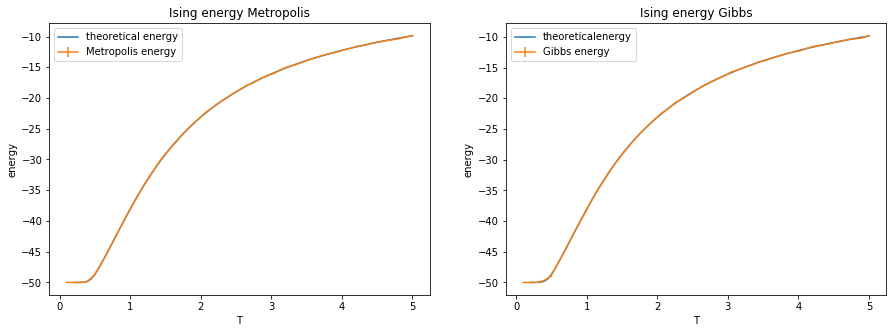

In [4]:
#dealing with energy
plot_quantity("energy")

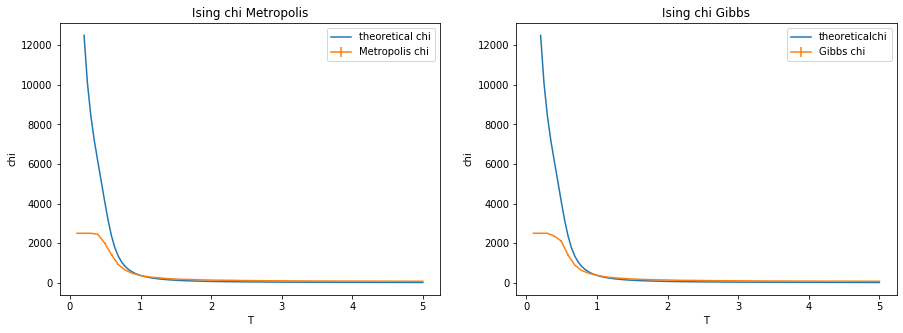

In [5]:
#dealing with susceptivity
plot_quantity("chi")

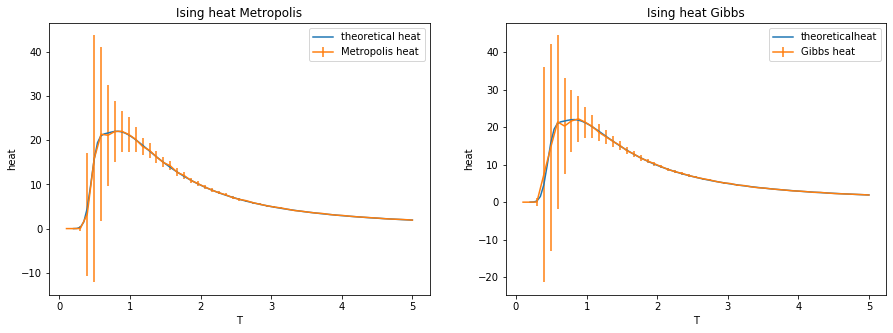

In [6]:
#dealing with specific heat
plot_quantity("heat")

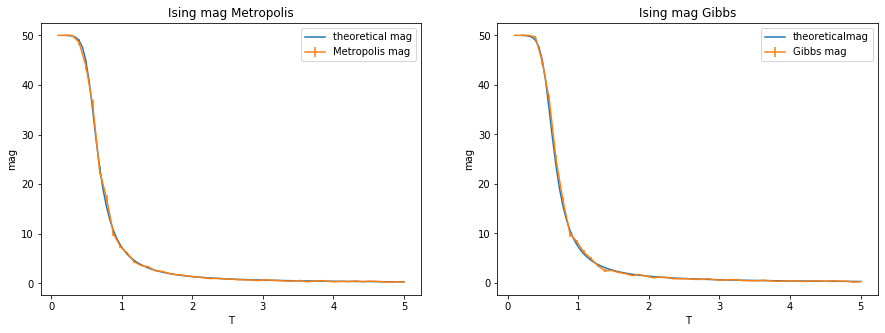

In [7]:
#dealing with magnetization
plot_quantity("mag")

It is worth to be noticed the remarkable agreeement beetween theoretical and simulated result.<br>
Two anomalies shall be discussed deeper:
 - A different discussion must be held for specific heat. The agreement with the theoretical curve is quite exact but the statistical incertainties are huge (and doesn't really correspond to the actual error in the estimation). The reason for that is the error on the value of $<H^2>$. The relative error is quite small O(2/1000) but when the specific heat is computed by $<H^2> - <H>^2$ the propagated error is in percentage quite high giving the results plotted above. Neglecting the error on $<H^2>$ would give uncertainties similar to the others but would have been uncorrect.
 - The simulator is not able to reproduce the functional form of suceptivity at low temperatures. This happens beacuse of the divergent behaviour of suceptivity which is difficoult to be reproduced in simulations